Travail réalise par Muthulingam Aginth

# <center><u><font color='red'>Projet 5 : Segmentez des clients d'un site e-commerce</font></u></center>

## Chargement des modules et dataset


In [1]:
import pandas as pd
import numpy as np
import random
import re
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV , cross_validate
from sklearn.compose import make_column_selector, make_column_transformer , ColumnTransformer 
from category_encoders import *
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import linear_model , metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.dummy import DummyRegressor

from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score , davies_bouldin_score , silhouette_score


import plotly.graph_objects as go
import plotly.offline as pyo
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import decomposition
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import collections

In [225]:
df_clean = pd.read_csv('dataset_cleane.csv')
df_clean.drop(columns=['customer_city','order_date'], inplace=True)

## Normalisation

In [226]:
categorical_columns = df_clean.select_dtypes(include=['object']).columns
numerical_columns = df_clean.select_dtypes(include=['int64','float64']).columns
bool_columns = df_clean.select_dtypes(include=['bool']).columns


ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
df_clean[numerical_columns] = ss.fit_transform(df_clean[numerical_columns])
ohe.fit(df_clean[categorical_columns])

OneHotEncoder(sparse=False)

In [227]:
X = pd.merge(df_clean[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(df_clean[categorical_columns])).set_index(df_clean.index),
        left_index = True, right_index = True)

In [228]:
categorical_columns

Index(['customer_state'], dtype='object')

In [229]:
df_clean[bool_columns]= df_clean[bool_columns].astype(int)

In [230]:
Xf = pd.merge(X,df_clean[bool_columns],left_index = True, right_index = True)

In [231]:
Xf.drop(columns=['R_rank_norm','F_rank_norm','M_rank_norm','price','nb_purchase'], inplace=True)
Xf.shape

(91453, 53)

## PCA et TSNE

In [9]:
pca = PCA(random_state=1)

In [10]:
X_pca = Xf.copy()

In [11]:
pca.fit(X_pca)

PCA(random_state=1)

In [12]:
X_pca = pca.transform(X_pca)[:, :19]

In [13]:
tsne = TSNE(n_components=2, init='pca')
X_tsne = tsne.fit_transform(X_pca)
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

,DIM1,DIM2
0,26.069386,-0.025449
1,-37.461491,10.745135
2,24.330057,12.849283
3,-18.904184,-5.288606
4,-1.364182,32.841660


In [14]:
ls_comp=[]
for i in range(1,X_pca.shape[1]+1):
    comp='Component '+str(i)
    ls_comp.append(comp)

df_pca = pd.DataFrame(X_pca,columns=ls_comp)
df_pca

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19
0,1.146939,1.200772,0.366334,-1.186446,-0.407761,0.364841,-0.066598,-0.693852,-0.068676,-1.411266,1.789328,0.707998,-0.574026,0.496899,0.523815,-0.068156,-0.109990,-0.126992,-0.016556
1,-1.184791,-0.862331,-1.157810,-0.822759,0.111255,0.970187,-0.630333,0.288437,-0.346558,-0.582092,-0.322408,1.188636,0.366172,-0.380692,-0.133164,-0.023114,0.124007,0.878024,-0.058812
2,1.421286,-1.011274,1.336232,2.341267,-0.773331,-0.655474,0.332438,0.918464,-0.421774,-1.096890,-0.431920,0.079520,-0.117016,0.068197,-0.614637,-0.147629,0.657328,-0.462467,0.060455
3,-0.306571,-1.129293,0.426478,1.065840,-0.528786,-0.512740,0.073998,0.788640,-0.007416,-0.607261,-0.180713,-0.302482,0.986499,-0.119306,-0.230749,0.386626,-0.495907,-0.286800,0.039708
4,0.529899,1.122909,-0.314424,0.966755,-0.109204,0.038093,-0.889585,0.813444,-0.028364,-0.533178,0.294073,0.355840,-0.444280,-0.073414,-0.342580,0.660444,-0.721473,-0.437508,-0.033046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91448,2.011728,3.068995,1.553744,2.358813,-0.219838,-0.526251,-0.326348,0.774047,-0.563285,0.279192,-0.115391,-0.987083,1.045477,0.232099,-0.136222,0.931135,0.361361,0.825200,0.084924
91449,0.746570,-1.487732,-0.513978,1.560635,-0.590432,-1.122815,0.855284,-0.452641,0.703990,0.404395,-0.008042,-0.617887,0.195051,-0.529742,-0.107717,0.288622,0.133036,0.882977,0.086432
91450,-1.514904,0.140978,1.331184,1.113330,0.444574,0.664875,-0.365250,0.920532,-0.755411,0.900736,-0.295059,-1.154714,-0.255554,-0.672359,0.083774,0.383576,0.007647,0.102996,0.139219
91451,0.829614,0.715842,0.505198,-1.469895,-0.142644,-0.033296,-0.423590,0.174612,0.286705,-0.456171,1.796117,-0.650227,0.013268,-0.133557,-0.204151,-0.092846,-0.060480,-0.016109,0.055729


## Kmeans

In [232]:
km = KMeans(n_clusters=4,random_state=30).fit(Xf.copy())
km_labels=km.labels_

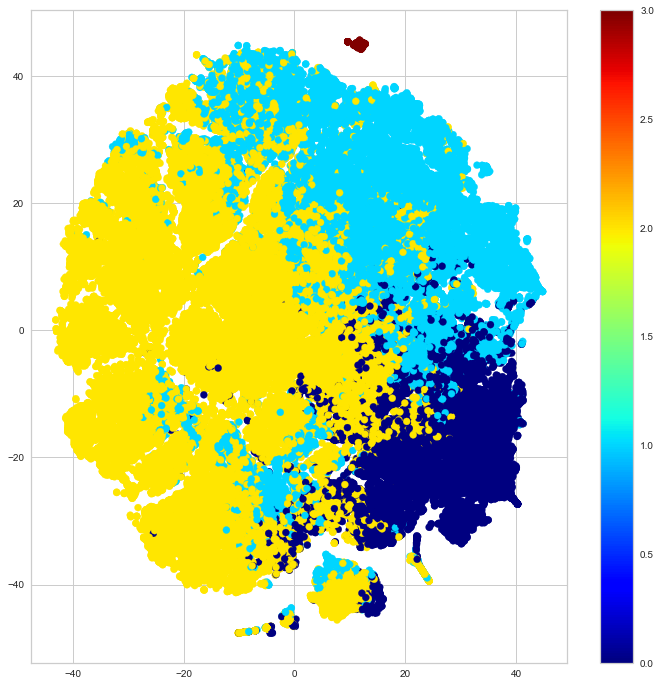

In [234]:
plt.figure(figsize=(12,12))
plt.scatter(X_tsne.copy()['DIM1'],X_tsne.copy()['DIM2'],c=km_labels,cmap=plt.cm.jet)
plt.colorbar()

In [235]:
counterkm = collections.Counter(km_labels)
counterkm=dict(counterkm)

In [236]:
counterkm

{1: 26053, 2: 52030, 0: 13155, 3: 215}

In [237]:
keys = list(counterkm.keys())
vals = [counterkm[k] for k in keys]

<AxesSubplot:title={'center':'Distribution of the number of individuals per cluster'}>

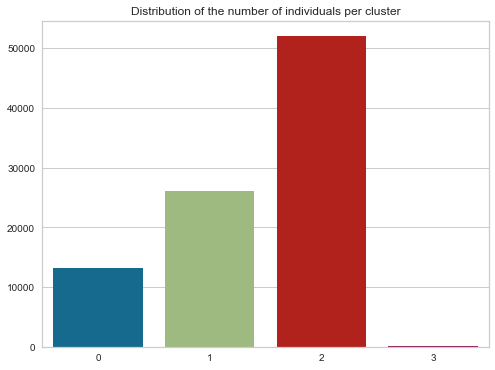

In [240]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of the number of individuals per cluster')
sns.barplot(x=keys, y=vals)

On voit que le cluster ne contient que 215 individus. Malgré le fait que ce cluster soit intéressant car il réprésente des
clients consommant enormément, nous devons priviligié les clusters avec n > 500. Il faut donc regrouper le cluster 3 dans 
un autre groupe. Après analyse on vois que le cluster 2 est celui qui correspond le mieux 

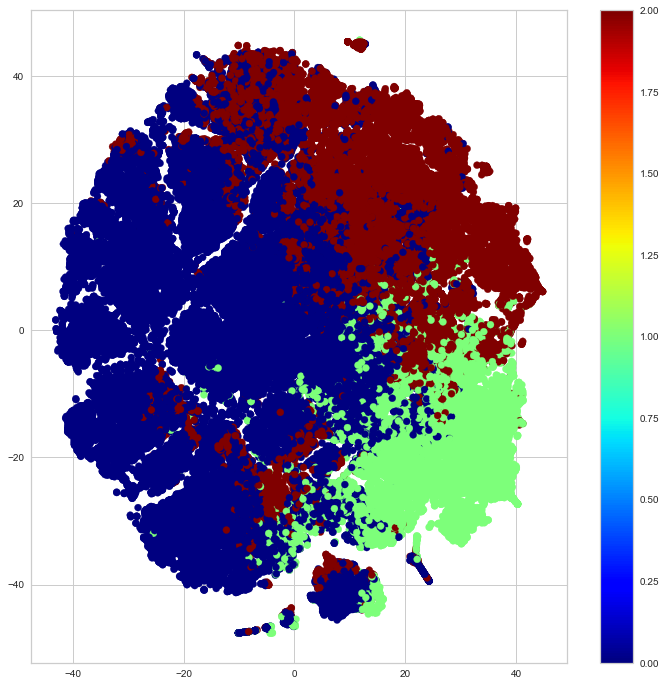

In [241]:
true_km = KMeans(n_clusters=3,random_state=30).fit(Xf.copy())
true_km_labels = true_km.labels_

plt.figure(figsize=(12,12))
plt.scatter(X_tsne.copy()['DIM1'],X_tsne.copy()['DIM2'],c=true_km_labels,cmap=plt.cm.jet)
plt.colorbar()

## Radar Plot

Le nombre de cluster optimal est de 3 mais il est interressant de voir comment evolue le profil client avec 4 client.

In [242]:
Xf_rp=Xf.copy()

In [243]:
Xf_rp['clusters']=km_labels   # 4 clusters
#Xf_rp['clusters']=true_km_labels   # 3 clusters

In [244]:
Xf_mean1 = Xf_rp.copy().groupby('clusters').mean()
Xf_mean1 = Xf_mean1.reset_index()
    
scaler = MinMaxScaler(feature_range=(0, 1))
Xf_mean = scaler.fit_transform(Xf_mean1.copy())

    
Xf_mean=pd.DataFrame(Xf_mean,columns=Xf_mean1.columns,index=Xf_mean1.index)
Xf_mean['clusters']=list(range(0,len(Xf_mean)))  #[0,1,2,3]
    
    
Xf_mean_product=Xf_mean.copy()[['Alimentation', 'Autres', 'Bricolage','Electronique/Electromenager',
                                    'Hygiene', 'Loisirs', 'Maison', 'Mode','Securite']]

Xf_mean_region=Xf_mean.copy()[['x0_AC', 'x0_AL', 'x0_AM', 'x0_AP', 'x0_BA', 'x0_CE',
                                   'x0_DF', 'x0_ES', 'x0_GO', 'x0_MA', 'x0_MG', 'x0_MS', 'x0_MT',
                                   'x0_PA','x0_PB', 'x0_PE', 'x0_PI', 'x0_PR', 'x0_RJ', 'x0_RN',
                                   'x0_RO', 'x0_RR','x0_RS', 'x0_SC', 'x0_SE', 'x0_SP', 'x0_TO']]

Xf_mean_var=Xf_mean.copy()[['delivery_time', 'difference_delivery',
                                'review_lenght','payment_installments', 'payment_sequential',
                                'answers_time','review_score', 'recency', 'frequency', 'monetary']]
    


In [245]:
def radar_plot(Xf_mean):
    categories = Xf_mean.columns
    categories = [*categories, categories[0]]
    
    if len(Xf_mean)==4 :
        c_0 = Xf_mean.loc[0].values ; c_0=[*c_0,c_0[0]]
        c_1 = Xf_mean.loc[1].values ; c_1=[*c_1,c_1[0]]
        c_2 = Xf_mean.loc[2].values ; c_2=[*c_2,c_2[0]]
        c_3 = Xf_mean.loc[3].values ; c_3=[*c_3,c_3[0]]

    
        fig = go.Figure(data=[
            go.Scatterpolar(r=c_0, theta=categories, fill='toself', name='Cluster 0'),
            go.Scatterpolar(r=c_1, theta=categories, fill='toself', name='Cluster 1'),
            go.Scatterpolar(r=c_2, theta=categories, fill='toself', name='Cluster 2'),
            go.Scatterpolar(r=c_3, theta=categories, fill='toself', name='Cluster 3')],
                        layout=go.Layout(title=go.layout.Title(text='Cluster comparison'),
                                         polar={'radialaxis': {'visible': True}},
                                         showlegend=True)
                       )
        
    else :
        c_0 = Xf_mean.loc[0].values ; c_0=[*c_0,c_0[0]]
        c_1 = Xf_mean.loc[1].values ; c_1=[*c_1,c_1[0]]
        c_2 = Xf_mean.loc[2].values ; c_2=[*c_2,c_2[0]]

    
        fig = go.Figure(data=[
            go.Scatterpolar(r=c_0, theta=categories, fill='toself', name='Cluster 0'),
            go.Scatterpolar(r=c_1, theta=categories, fill='toself', name='Cluster 1'),
            go.Scatterpolar(r=c_2, theta=categories, fill='toself', name='Cluster 2')],
                        layout=go.Layout(title=go.layout.Title(text='Cluster comparison'),
                                         polar={'radialaxis': {'visible': True}},
                                         showlegend=True)
                       )
        
        print('ok')
    
    pyo.plot(fig)
    
    return

In [258]:
radar_plot(Xf_mean_product)

## Maintenance de l'outil de segmentation

In [247]:
Xf['clusters']=true_km_labels

In [248]:
df_complet = pd.read_csv('dataset_cleane.csv')

In [249]:
Xf['order_date']=df_complet['order_date']
Xf = Xf.sort_values(by=['order_date'],ascending=[True])
Xf['order_date'] = pd.to_datetime(Xf['order_date'],errors='coerce')
Xf['ordinal']=Xf['order_date'].apply(lambda x: x.toordinal())

In [250]:
def split2_df(Xf,nb_mois):
    df=Xf.copy()    
    df.drop(columns=['clusters'], inplace=True)
    
    
    date_start = datetime.datetime.fromordinal(736240)
    date_end = datetime.datetime.fromordinal(736935)
    
    
    Nb_mois_df = (datetime.datetime.fromordinal(736935)-datetime.datetime.fromordinal(736240)).days/30.4167
    
    max_mois=Nb_mois_df/nb_mois
    max_mois=round(max_mois,0)
    
    nb_mois_j=nb_mois*30
    
    ls=[] ; a=0
    
    ord_start=736240 ; ord_end=736935
    ls.append(df.loc[(df["ordinal"] >= ord_start)& (df["ordinal"] <= ord_start+nb_mois_j)])
    
    while a<max_mois:
        if a==max_mois:
            ord_start=ord_start+nb_mois_j+1
            ls.append(df.loc[(df["ordinal"] >= ord_start)& (df["ordinal"] <= ord_end)])

        else : 
            ord_start=ord_start+nb_mois_j+1
            ls.append(df.loc[(df["ordinal"] >= ord_start)& (df["ordinal"] <= ord_start+nb_mois_j)])

        a+=1
    
    for i in range(len(ls)) :
        if len(ls[i])==0:
            del ls[i]
            
    return ls

In [251]:
ls_df2 = split2_df(Xf,2)

In [252]:
N=1
z=0
for i in ls_df2 :
    nb_mois = max(i['order_date'])-min(i['order_date'])
    nb_mois = nb_mois/np.timedelta64(1, 'h')/24/30,4167
    print('Dataframe',N,' : ', round(nb_mois[0],0),' MOIS et ',len(i),' clients')
    z+=len(i)
    N+=1
    
print(z)

Dataframe 1  :  0.0  MOIS et  248  clients
Dataframe 2  :  1.0  MOIS et  728  clients
Dataframe 3  :  2.0  MOIS et  4006  clients
Dataframe 4  :  2.0  MOIS et  5545  clients
Dataframe 5  :  2.0  MOIS et  6681  clients
Dataframe 6  :  2.0  MOIS et  7868  clients
Dataframe 7  :  2.0  MOIS et  11448  clients
Dataframe 8  :  2.0  MOIS et  11591  clients
Dataframe 9  :  2.0  MOIS et  13389  clients
Dataframe 10  :  2.0  MOIS et  12783  clients
Dataframe 11  :  2.0  MOIS et  12149  clients
Dataframe 12  :  1.0  MOIS et  5017  clients
91453


On supprime les 2er dataframe car il comporte peu de clients

In [253]:
for i in ls_df2 :
    i.drop(columns=['order_date','ordinal'], inplace=True)

In [254]:
 from sklearn.metrics.cluster import adjusted_rand_score

In [255]:
def ari(Xf1,ls_df,ls_mois):
    dataset=Xf1.copy()
    km1 = KMeans(n_clusters=3,random_state=30).fit(Xf1)
    km_labels=km.labels_
    ls_ari=[]
    for i in ls_df :
        dataset= i
        km2 = KMeans(n_clusters=3,random_state=30).fit(dataset)
        new_lab = km2.predict(dataset)
        old_lab= km1.predict(dataset)
        ls_ari.append(adjusted_rand_score(old_lab,new_lab))

    df_ari=pd.DataFrame(ls_ari,columns=['Ari'])
    df_ari["mois"]=ls_mois
    return df_ari

In [256]:
df_ari2=  ari(ls_df2[2],ls_df2[3:],['4 mois','6 mois','8 mois','10 mois','12 mois','14 mois','16 mois','18 mois','19 mois'])

Text(0.5, 1.0, 'Evolution de l ARI')

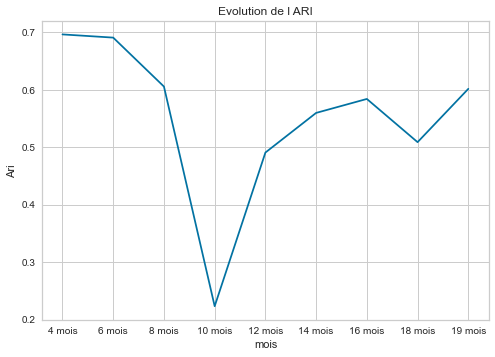

In [257]:
sns.lineplot(data=df_ari2, x="mois", y="Ari")
plt.title('Evolution de l ARI')